In [1]:
import torch
from torch import nn


net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [2]:
from torch import optim
from torch.autograd import Variable as V
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
Y = digits.target
X = torch.Tensor(X)
Y = torch.LongTensor(Y)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
losses = []

In [3]:
for epoc in range(500):
    optimizer.zero_grad()
    y_pred = net(V(X))
    loss = loss_fn(y_pred, V(Y))
    loss.backward()
    optimizer.step()
    losses.append(loss.data[0])

In [4]:
from torch.utils.data import TensorDataset, DataLoader


ds = TensorDataset(X, Y)
loader = DataLoader(ds, batch_size=64, shuffle=True)
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
losses = []
for epoch in range(10):
    running_loss = 0.0
    for x, y in loader:
        x = V(x)
        y = V(y)
        y_pred = net(x)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    losses.append(running_loss)

In [5]:
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Linear(k, 10),
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [6]:
train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = net(V(X_test))
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

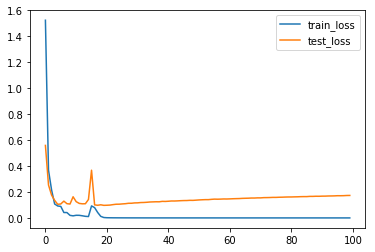

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')

In [8]:
# 過学習を抑えるためにDropoutを加える
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k, 10),
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [9]:
train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    # ネットワークを訓練モードに切り替える
    net.train()
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = net(V(X_test))
    # ネットワークを評価モードに切り替える
    net.eval()
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

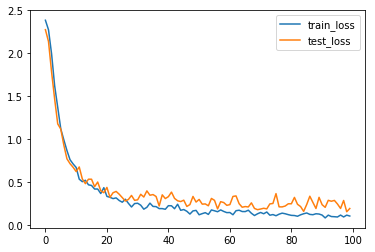

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')

In [11]:
# バッチノーマリゼーション
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

In [12]:
train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    # ネットワークを訓練モードに切り替える
    net.train()
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = net(V(X_test))
    # ネットワークを評価モードに切り替える
    net.eval()
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

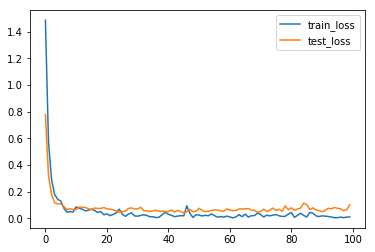

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')

In [14]:
# モジュール化してみる
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return x
    

k = 100
mlp = nn.Sequential(
    CustomLinear(64, k),
    CustomLinear(k, k),
    CustomLinear(k, k),
    nn.Linear(k, 10)
)

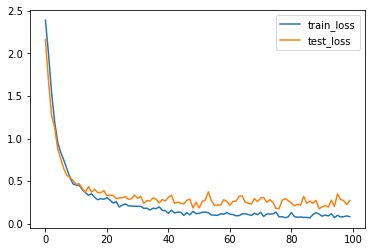

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    # ネットワークを訓練モードに切り替える
    mlp.train()
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = mlp(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = mlp(V(X_test))
    # ネットワークを評価モードに切り替える
    mlp.eval()
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')

In [16]:
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.drop(x)
        return x


k = 100
    
class MyMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in1 = CustomLinear(in_features, k)
        self.in2 = CustomLinear(k, k)
        self.in3 = CustomLinear(k, k)
        self.in4 = CustomLinear(k, k)
        self.in5 = nn.Linear(k, out_features)
        
    def forward(self, x):
        x = self.in1(x)
        x = self.in2(x)
        x = self.in3(x)
        x = self.in4(x)
        x = self.in5(x)
        return x
    
    
mlp = MyMLP(64, 10)

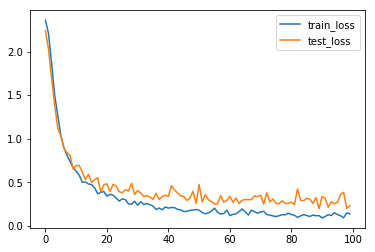

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    # ネットワークを訓練モードに切り替える
    mlp.train()
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = mlp(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = mlp(V(X_test))
    # ネットワークを評価モードに切り替える
    mlp.eval()
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')

In [27]:
# さらにモジュール化する、ついでにバッチノーマリゼーションつける
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features, bias=True, p=0.5):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features, bias)
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(out_features)
        self.drop = nn.Dropout(p)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        x = self.batch_norm(x)
        x = self.drop(x)
        return x

k = 100
    
class MyMLP(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in1 = CustomLinear(in_features, k)
        self.in2 = CustomLinear(k, k)
        self.in3 = CustomLinear(k, k)
        self.in4 = CustomLinear(k, k)
        self.in5 = nn.Linear(k, out_features)
        
    def forward(self, x):
        x = self.in1(x)
        x = self.in2(x)
        x = self.in3(x)
        x = self.in4(x)
        x = self.in5(x)
        return x
    
    
mlp = MyMLP(64, 10)

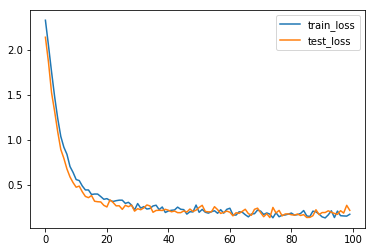

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


X = digits.data
Y = digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train, X_test = torch.Tensor(X_train), torch.Tensor(X_test)
Y_train, Y_test = torch.LongTensor(Y_train), torch.LongTensor(Y_test)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters())
ds = TensorDataset(X_train, Y_train)
loader = DataLoader(ds, batch_size=32, shuffle=True)

train_losses = []
test_losses = []
for epoch in range(100):
    running_loss = 0.0
    # ネットワークを訓練モードに切り替える
    mlp.train()
    for i, (x, y) in enumerate(loader):
        xx = V(x)
        yy = V(y)
        y_pred = mlp(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.data[0]
    train_losses.append(running_loss / i)
    y_pred = mlp(V(X_test))
    # ネットワークを評価モードに切り替える
    mlp.eval()
    test_loss = loss_fn(y_pred, V(Y_test))
    test_losses.append(test_loss.data[0])

plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.legend(loc='upper right')